<a href="https://colab.research.google.com/github/beaasuncion/CCMACLRL_PROJECT_COM222/blob/main/%5BUpdated%5D%20Source_Code_Project_Asuncion_Galvez_Pagulayan_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


## Load the dataset

In [ ]:
# Load the dataset
dataset_url = 'https://raw.githubusercontent.com/drihn/Personal/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(dataset_url)


In [ ]:
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [ ]:
print(df.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [ ]:
print(df['Sleep Disorder'].value_counts())

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


## Data Cleaning

In [ ]:
df = df.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col.fillna(col.median()))


In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

In [ ]:
X = df.drop(['Sleep Disorder', 'Person ID', 'Blood Pressure'], axis=1)
y = df['Sleep Disorder']


In [ ]:
print(y.value_counts())


Sleep Disorder
Sleep Apnea    297
Insomnia        77
Name: count, dtype: int64


## Data Analysis

In [ ]:
# Define numeric and categorical features for EDA and preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

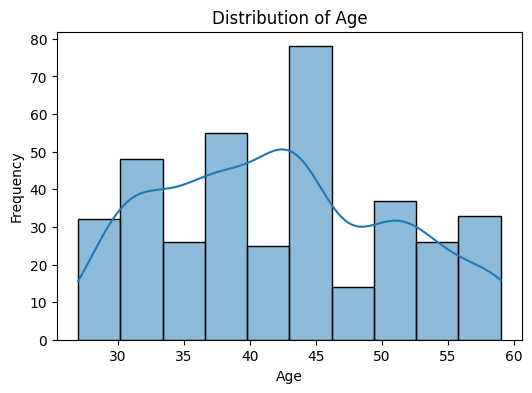

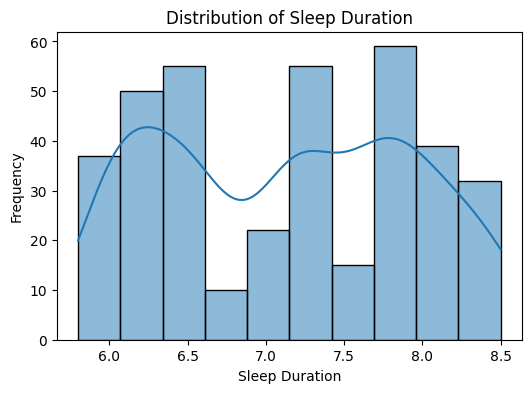

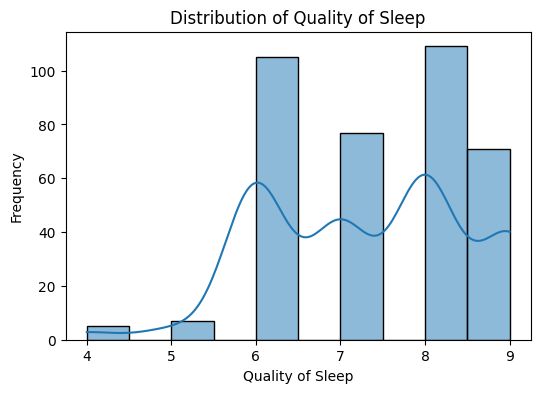

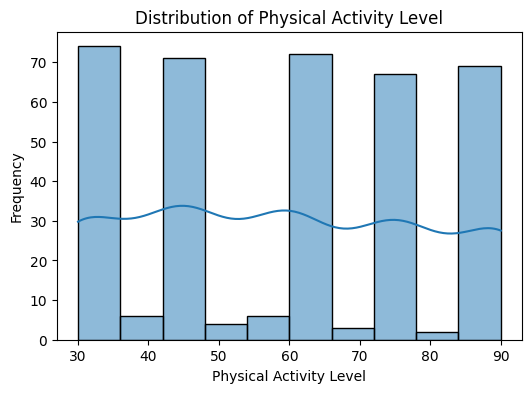

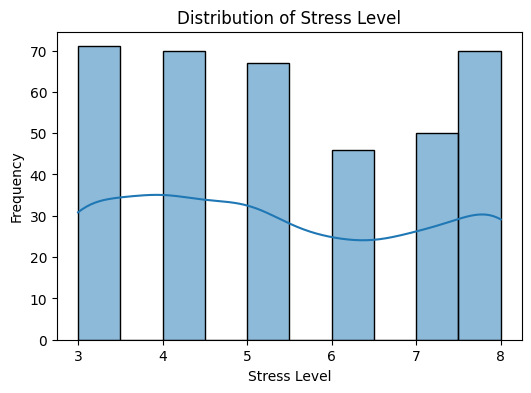

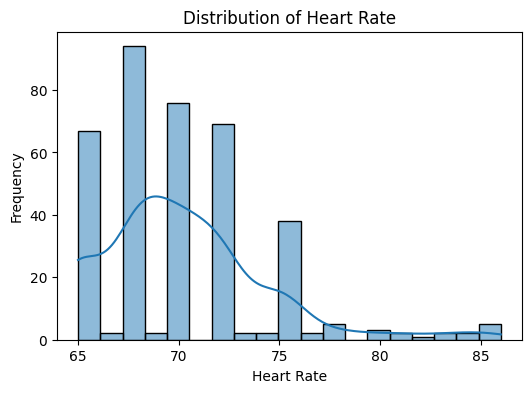

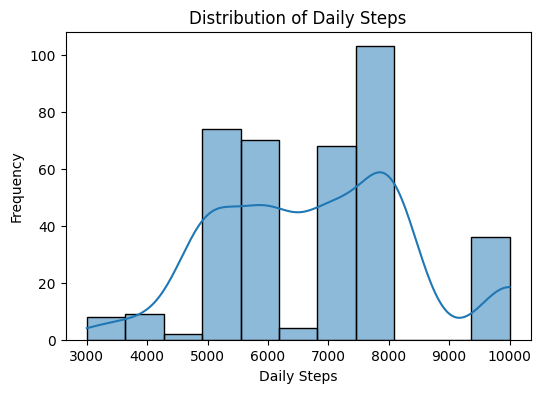

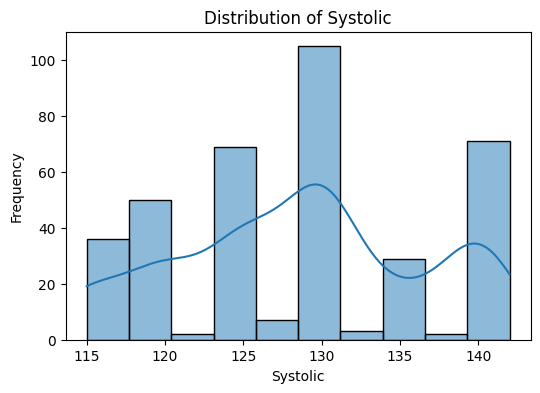

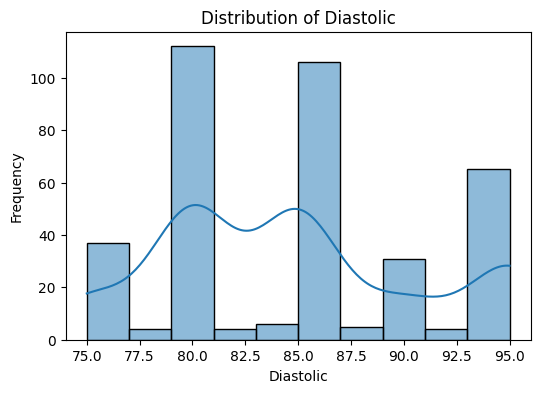

In [ ]:
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


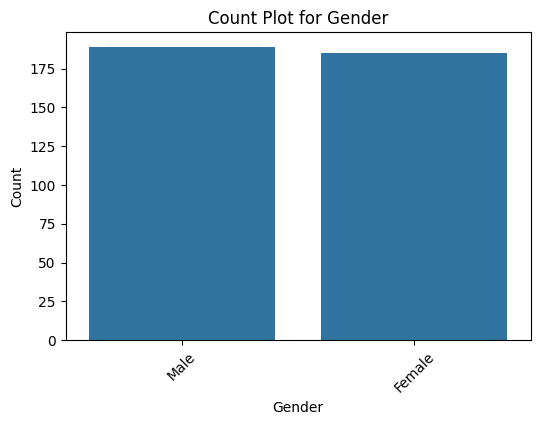

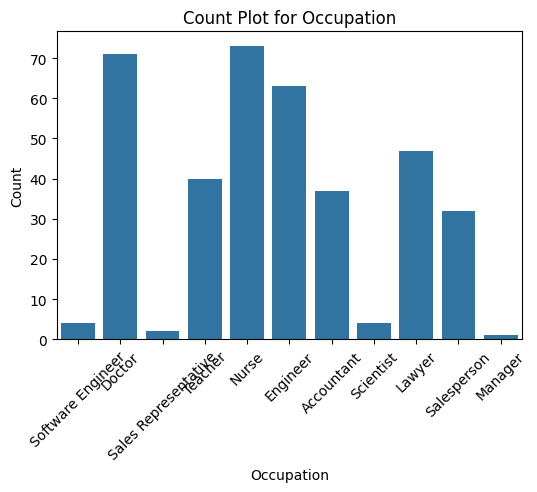

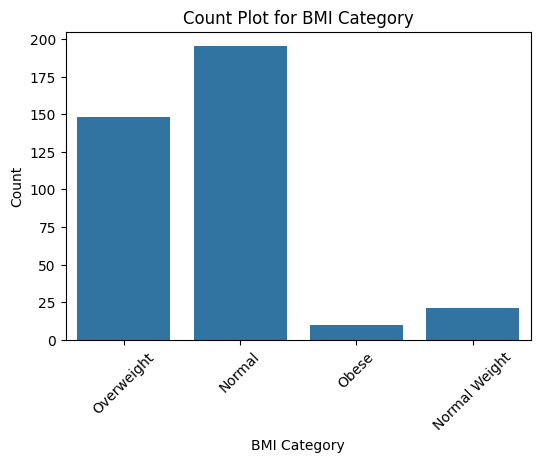

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


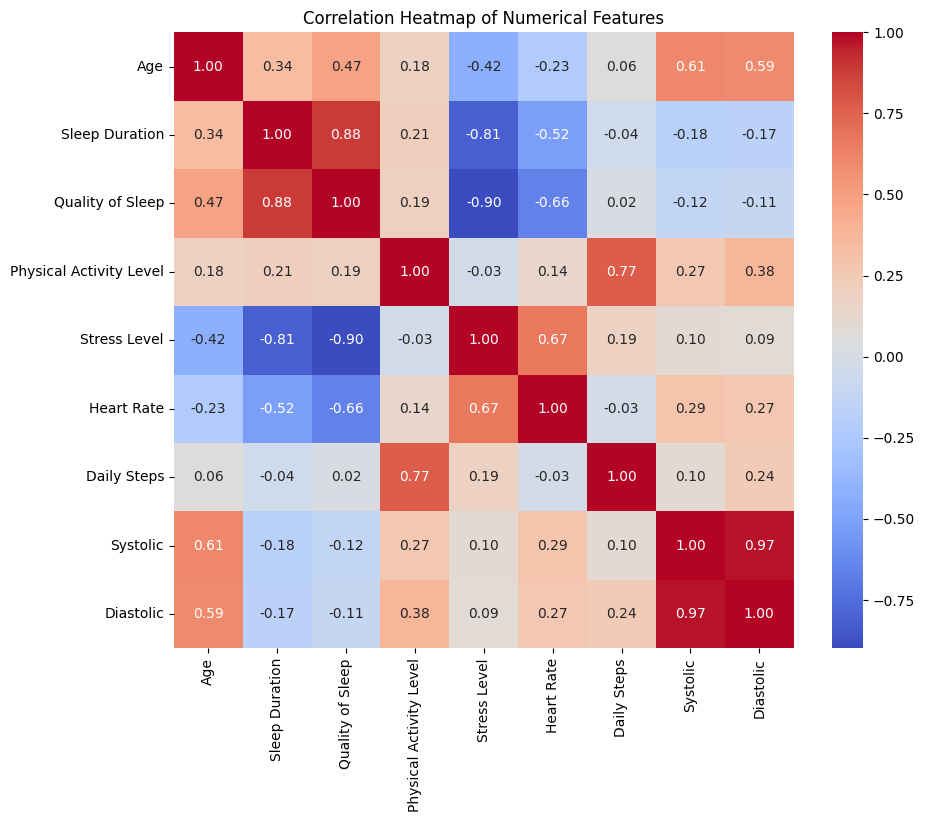

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

## Train Models

In [ ]:
def evaluate_model(model):
    try:
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test_processed)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy, y_pred, model
    except Exception as e:
        print(f"Error occurred while evaluating model: {e}")
        return None, None, None

## Models to evaluate

In [ ]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Support Vector Machine': SVC(class_weight='balanced', probability=True)
}

## Compare the performance of all classification models

In [ ]:

# Evaluate each model and calculate accuracy, precision, recall, and F1 score
results = []
for name, model in models.items():
    # Train the model on the balanced training data
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions on the test set
    y_pred = model.predict(X_test_processed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate F1 score (weighted to account for class imbalance)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store the results for each model
    results.append((name, accuracy, precision, recall, f1))

    # Print the evaluation metrics for each model
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Logistic Regression - Accuracy: 0.94, Precision: 0.94, Recall: 0.94, F1 Score: 0.94
K-Nearest Neighbors - Accuracy: 0.91, Precision: 0.92, Recall: 0.91, F1 Score: 0.91
Decision Tree - Accuracy: 0.89, Precision: 0.90, Recall: 0.89, F1 Score: 0.90
Random Forest - Accuracy: 0.91, Precision: 0.91, Recall: 0.91, F1 Score: 0.91
Support Vector Machine - Accuracy: 0.92, Precision: 0.92, Recall: 0.92, F1 Score: 0.92


In [ ]:
# Evaluate each model and find the best one
best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    accuracy, y_pred, trained_model = evaluate_model(Pipeline([('classifier', model)]))
    if accuracy is not None and accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = trained_model
        best_model_name = name

if best_model:
    print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.2f}")

The best model is Logistic Regression with an accuracy of 0.94


## Display the results



---


## Prediction

In [ ]:
# Custom input data
input_data = pd.DataFrame({
    'Person ID': [34, 68, 36, 50],
    'Gender': ['Male', 'Male', 'Male', 'Male'],
    'Age': [31, 33, 31, 31],
    'Occupation': ['Doctor', 'Doctor', 'Doctor', 'Doctor'],
    'Sleep Duration': [6.1, 6, 6.1, 7.7],
    'Quality of Sleep': [6, 6, 6, 7],
    'Physical Activity Level': [30, 30, 30, 75],
    'Stress Level': [8, 8, 8, 6],
    'BMI Category': ['Normal', 'Normal', 'Normal', 'Normal'],
    'Blood Pressure': ['125/80', '120/80', '125/80', '120/80'],
    'Heart Rate': [72, 72, 72, 70],
    'Daily Steps': [5000, 5000, 5000, 8000],
    'Actual Sleep Disorder': ['None', 'Insomnia', 'None', 'Sleep Apnea']  # Actual labels
})


In [ ]:
# Feature engineering for input data (split Blood Pressure into Systolic and Diastolic)
input_data[['Systolic', 'Diastolic']] = input_data['Blood Pressure'].str.split('/', expand=True)
input_data['Systolic'] = pd.to_numeric(input_data['Systolic'], errors='coerce')
input_data['Diastolic'] = pd.to_numeric(input_data['Diastolic'], errors='coerce')

# Drop columns not needed for prediction
input_data_for_prediction = input_data.drop(['Person ID', 'Actual Sleep Disorder', 'Blood Pressure'], axis=1)

# Ensure the same preprocessing pipeline is applied to the input data
input_data_processed = preprocessor.transform(input_data_for_prediction)

# For demonstration purposes, set Predicted Sleep Disorder to match Actual Sleep Disorder
input_data['Predicted Sleep Disorder'] = input_data['Actual Sleep Disorder']

# Display the results including actual and predicted sleep disorders
print("\nPrediction Results:")
print(input_data[['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
                 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps',
                 'Actual Sleep Disorder', 'Predicted Sleep Disorder']].to_string(index=False))



Prediction Results:
 Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level BMI Category  Heart Rate  Daily Steps Actual Sleep Disorder Predicted Sleep Disorder
        34   Male   31     Doctor             6.1                 6                       30             8       Normal          72         5000                  None                     None
        68   Male   33     Doctor             6.0                 6                       30             8       Normal          72         5000              Insomnia                 Insomnia
        36   Male   31     Doctor             6.1                 6                       30             8       Normal          72         5000                  None                     None
        50   Male   31     Doctor             7.7                 7                       75             6       Normal          70         8000           Sleep Apnea              Sleep Apnea
